# 데이터 시각화

## 월별, 연령대별 본인부담비용 시각화 분석

In [76]:
import pandas as pd

In [77]:
import numpy as np

In [78]:
import matplotlib.pyplot as plt

In [79]:
import seaborn as sns

In [80]:
file_path = './files_new/df_month_age_any_월별연령대별본인부담비용.xlsx'
df_month_age_any = pd.read_excel(file_path)
df_month_age_any

,수진자연령,요양개시일자,심결본인부담금,연령대,요양개시월
0,3,20131211,2900,9세이하,12
1,6,20130129,2800,9세이하,1
2,3,20130130,2700,9세이하,1
3,6,20130130,6500,9세이하,1
4,6,20130502,2800,9세이하,5
...,...,...,...,...,...
5626,94,20130423,1500,90대,4
5627,94,20130709,1500,90대,7
5628,94,20131208,1500,90대,12
5629,94,20130401,1500,90대,4


In [81]:
df_month_age_any.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   수진자연령    5631 non-null   int64 
 1   요양개시일자   5631 non-null   int64 
 2   심결본인부담금  5631 non-null   int64 
 3   연령대      5631 non-null   object
 4   요양개시월    5631 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 220.1+ KB


### 1. 월별 병원을 많이 찾는 연령대 분석

In [82]:
pivot_month_age = df_month_age_any.pivot_table(values = '수진자연령',
                             index = '요양개시월',
                             columns = '연령대',
                             aggfunc = 'count')

#### - NaN 값을 0으로 바꾸기

In [83]:
pivot_month_age.fillna(0, inplace = True)
pivot_month_age

연령대,10대,20대,30대,40대,50대,60대,70대,80대,90대,9세이하
요양개시월,,,,,,,,,,
1,39.0,15.0,40.0,52.0,108.0,95.0,76.0,9.0,2.0,52.0
2,28.0,26.0,39.0,45.0,69.0,63.0,78.0,6.0,0.0,53.0
3,34.0,33.0,33.0,43.0,67.0,111.0,91.0,15.0,0.0,70.0
4,36.0,22.0,44.0,53.0,71.0,81.0,72.0,4.0,3.0,59.0
5,35.0,30.0,34.0,50.0,75.0,109.0,94.0,16.0,0.0,53.0
6,23.0,15.0,30.0,52.0,55.0,110.0,80.0,11.0,1.0,36.0
7,31.0,21.0,34.0,69.0,71.0,108.0,78.0,11.0,1.0,52.0
8,32.0,17.0,28.0,52.0,86.0,89.0,74.0,6.0,1.0,73.0
9,38.0,26.0,35.0,57.0,64.0,81.0,90.0,6.0,1.0,62.0


### 2. 선그래프

#### - 그래프 크기 지정하기

In [84]:
plt.rcParams['figure.figsize'] = (20, 10)

#### - 선의 두께 지정

In [85]:
plt.rcParams['lines.linewidth'] = 2

#### - 폰트 지정

In [86]:
plt.rc('font', family = 'Malgun Gothic', size = 10)

#### - 데이터 넣기

<AxesSubplot:xlabel='요양개시월'>

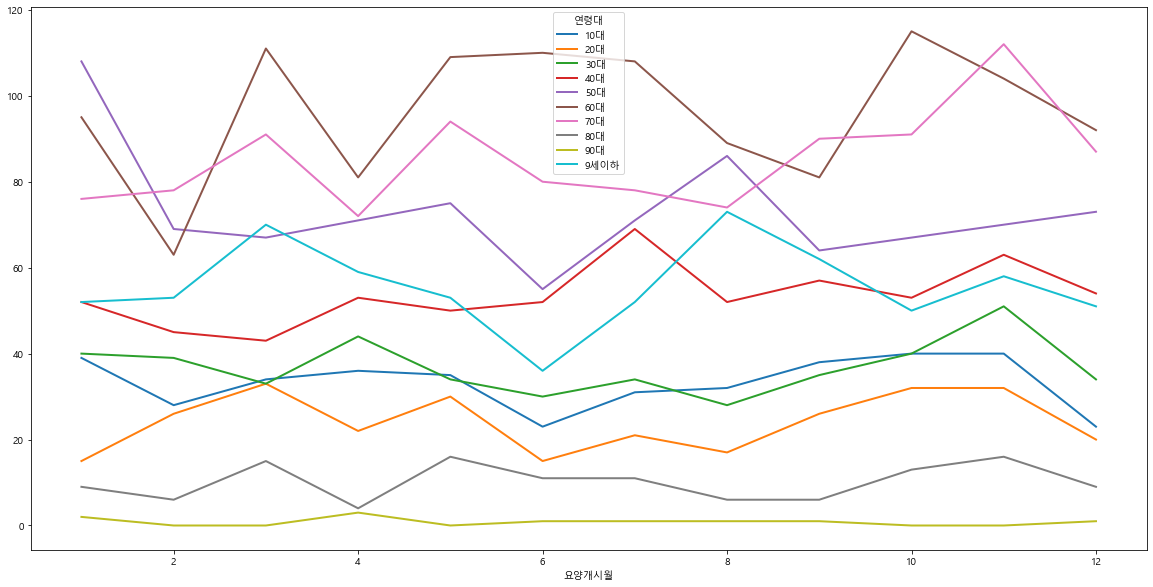

In [87]:
pivot_month_age.plot()

#### - 전부 합치기

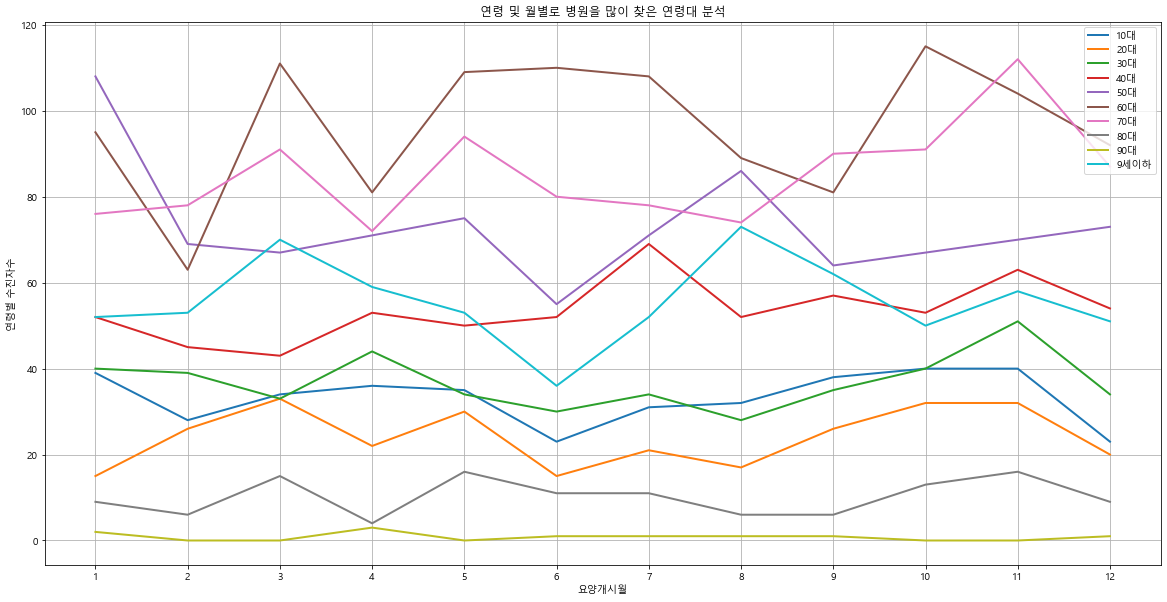

In [88]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rc('font', family = 'Malgun Gothic', size = 10)
pivot_month_age.plot()
plt.ylabel('연령별 수진자수')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.title('연령 및 월별로 병원을 많이 찾은 연령대 분석')
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

### 3. 히트맵

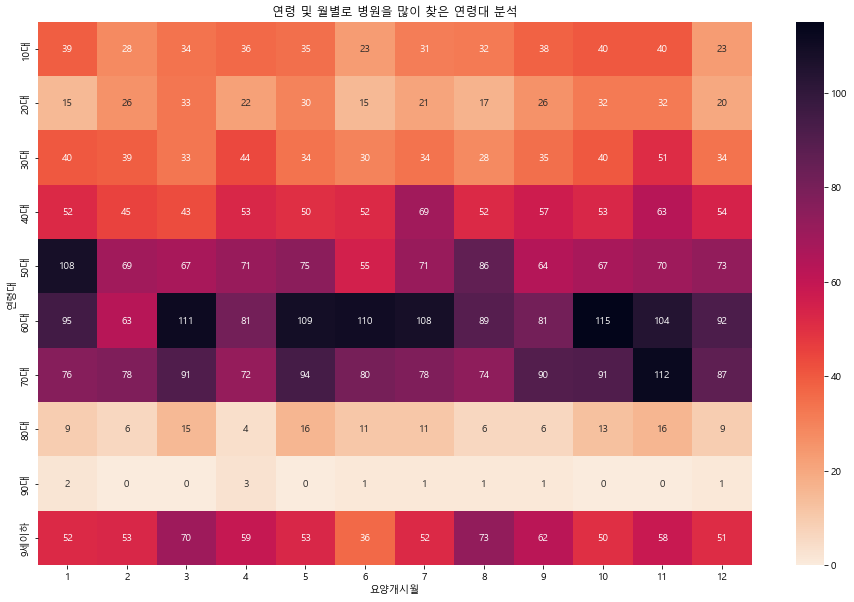

In [92]:
pivot_month_age2 = df_month_age_any.pivot_table(values = '수진자연령',
                             index = '연령대',
                             columns = '요양개시월',
                             aggfunc = 'count')

pivot_month_age2.fillna(0, inplace = True)

plt.figure(figsize = (16, 10))
sns.heatmap(pivot_month_age2, annot = True, fmt = '.0f', cmap = 'rocket_r')
plt.title('연령 및 월별로 병원을 많이 찾은 연령대 분석')
plt.show()

## 월별 연령대별 본인부담금을 많이 내는 연령대 분석

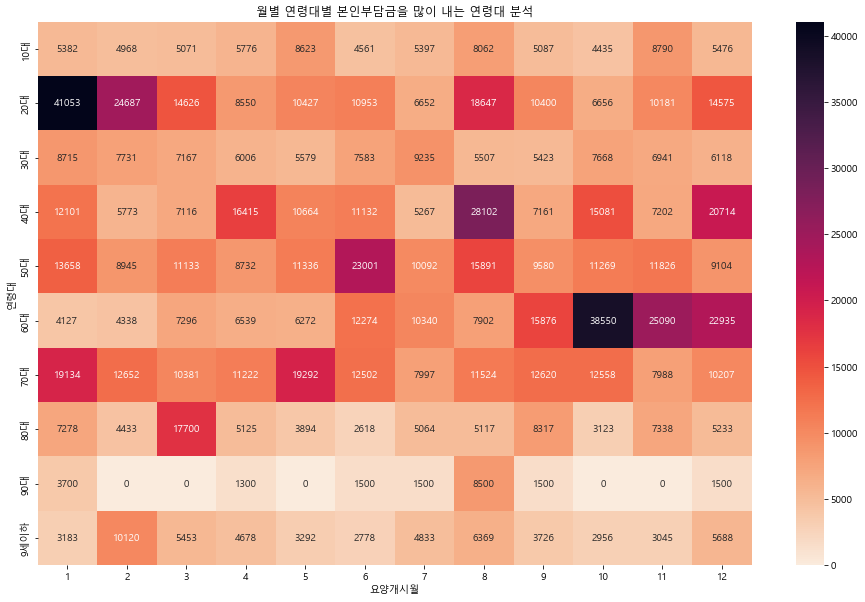

In [103]:
df_month_age_money = df_month_age_any.pivot_table(values = '심결본인부담금',
                             index = '연령대',
                             columns = '요양개시월',
                             aggfunc = 'mean')

df_month_age_money.fillna(0, inplace = True)

plt.figure(figsize = (16, 10))
sns.heatmap(df_month_age_money, annot = True, fmt = '.0f', cmap = 'rocket_r')
plt.title('월별 연령대별 본인부담금을 많이 내는 연령대 분석')
plt.show()

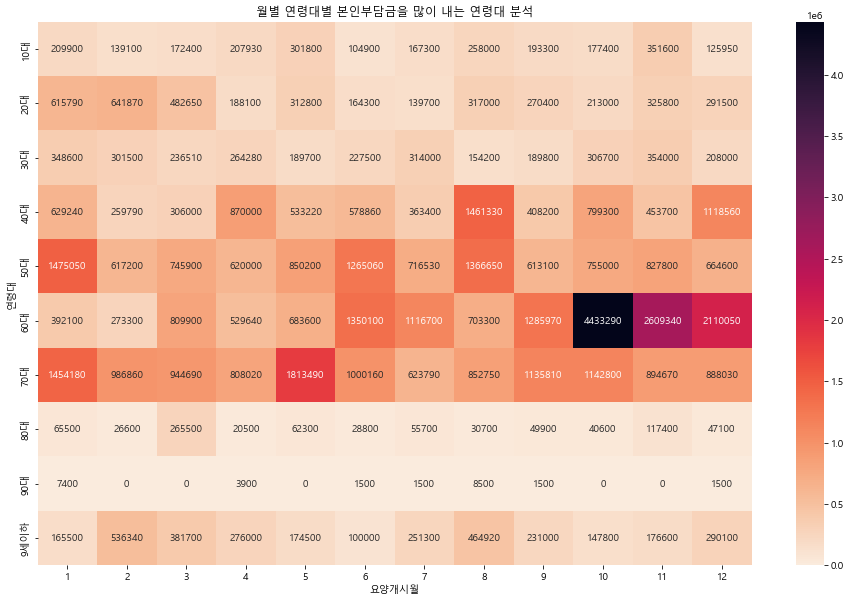

In [104]:
df_month_age_money2 = df_month_age_any.pivot_table(values = '심결본인부담금',
                             index = '연령대',
                             columns = '요양개시월',
                             aggfunc = 'sum')

df_month_age_money2.fillna(0, inplace = True)

plt.figure(figsize = (16, 10))
sns.heatmap(df_month_age_money2, annot = True, fmt = '.0f', cmap = 'rocket_r')
plt.title('월별 연령대별 본인부담금을 많이 내는 연령대 분석')
plt.show()

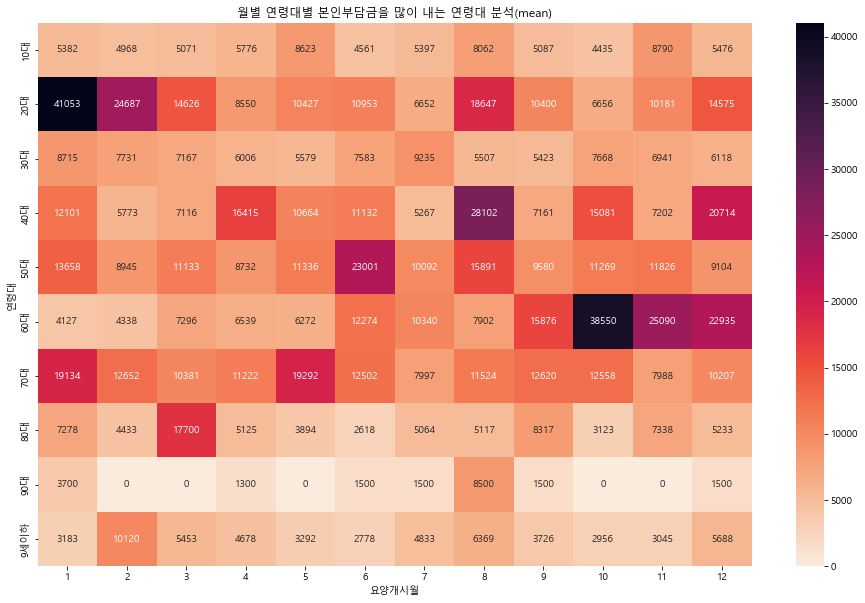

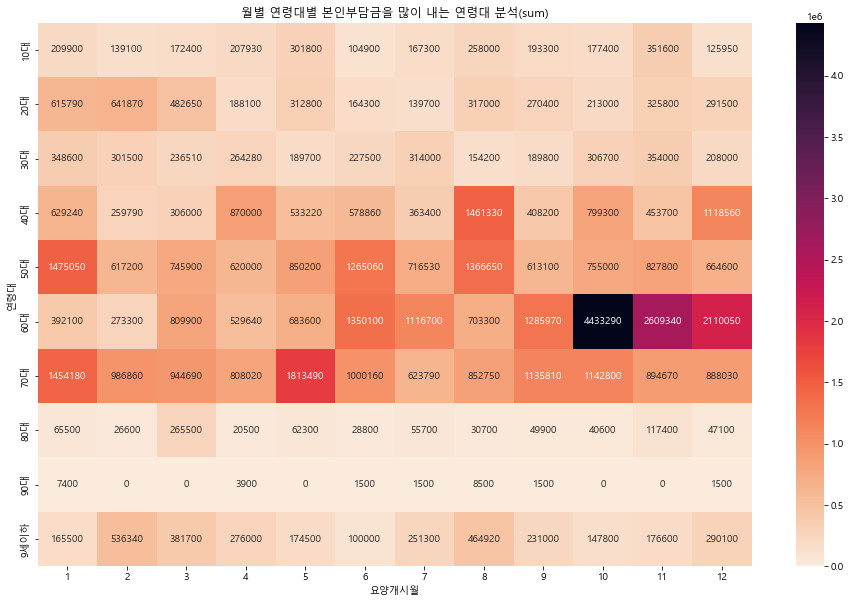

In [106]:
df_month_age_money = df_month_age_any.pivot_table(values = '심결본인부담금',
                             index = '연령대',
                             columns = '요양개시월',
                             aggfunc = 'mean')

df_month_age_money.fillna(0, inplace = True)

plt.figure(figsize = (16, 10))
sns.heatmap(df_month_age_money, annot = True, fmt = '.0f', cmap = 'rocket_r')
plt.title('월별 연령대별 본인부담금을 많이 내는 연령대 분석(mean)')
plt.show()

df_month_age_money2 = df_month_age_any.pivot_table(values = '심결본인부담금',
                             index = '연령대',
                             columns = '요양개시월',
                             aggfunc = 'sum')

df_month_age_money2.fillna(0, inplace = True)

plt.figure(figsize = (16, 10))
sns.heatmap(df_month_age_money2, annot = True, fmt = '.0f', cmap = 'rocket_r')
plt.title('월별 연령대별 본인부담금을 많이 내는 연령대 분석(sum)')
plt.show()